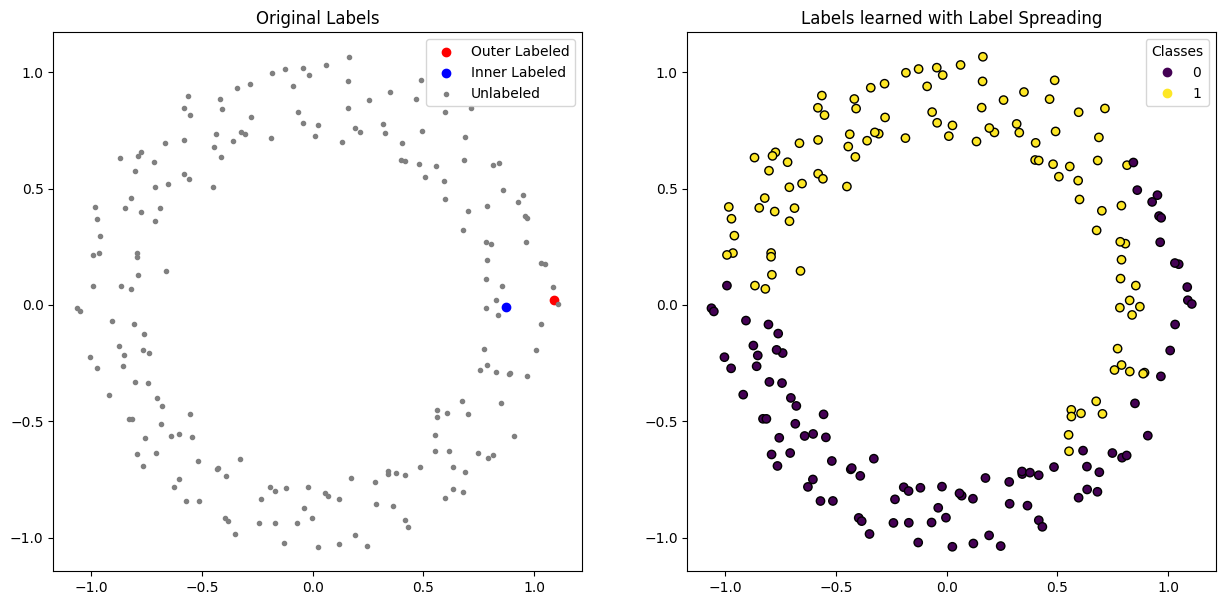

In [ ]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.semi_supervised import LabelSpreading
import matplotlib.pyplot as plt

# Parameters
n_samples = 200  # number of samples
outer, inner = 0, 1  # class labels for outer and inner circles

# Generate synthetic dataset
X, y = make_circles(n_samples=n_samples, shuffle=False, noise=0.05, random_state=0)

# Assign labels: only the first and last sample are labeled; the rest are unlabeled
labels = -1 * np.ones(n_samples)  # start with all unlabeled
labels[0] = outer  # label the first one as outer circle
labels[-1] = inner  # label the last one as inner circle

# Create a Label Spreading model instance
label_spread = LabelSpreading(kernel='knn', alpha=0.8)

# Fit the model to the data
label_spread.fit(X, labels)

# Predict the labels on all data points
output_labels = label_spread.transduction_

# Plot the results
plt.figure(figsize=(15, 7))

# Plot the original labeled points
plt.subplot(1, 2, 1)
plt.title("Original Labels")
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='red', marker='o', label='Outer Labeled')
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='blue', marker='o', label='Inner Labeled')
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='gray', marker='.', label='Unlabeled')
plt.legend()

# Plot the spread labels
plt.subplot(1, 2, 2)
plt.title("Labels learned with Label Spreading")
scatter = plt.scatter(X[:, 0], X[:, 1], c=output_labels, cmap='viridis', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Classes")

plt.show()


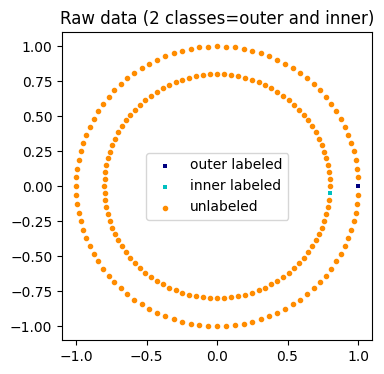

In [ ]:
import numpy as np

from sklearn.datasets import make_circles

n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.0)
labels[0] = outer
labels[-1] = inner
# Plot raw data

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.scatter(
    X[labels == outer, 0],
    X[labels == outer, 1],
    color="navy",
    marker="s",
    lw=0,
    label="outer labeled",
    s=10,
)
plt.scatter(
    X[labels == inner, 0],
    X[labels == inner, 1],
    color="c",
    marker="s",
    lw=0,
    label="inner labeled",
    s=10,
)
plt.scatter(
    X[labels == -1, 0],
    X[labels == -1, 1],
    color="darkorange",
    marker=".",
    label="unlabeled",
)
plt.legend(scatterpoints=1, shadow=False, loc="center")
_ = plt.title("Raw data (2 classes=outer and inner)")

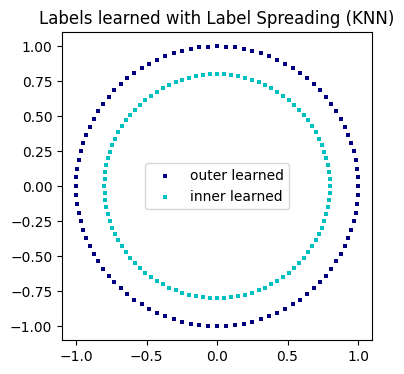

In [ ]:
from sklearn.semi_supervised import LabelSpreading

label_spread = LabelSpreading(kernel="knn", alpha=0.8)
label_spread.fit(X, labels)

LabelSpreading
LabelSpreading(alpha=0.8, kernel='knn')


# Now, we can check which labels have been associated with each sample when the label was unknown.

output_labels = label_spread.transduction_
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]

plt.figure(figsize=(4, 4))
plt.scatter(
    X[outer_numbers, 0],
    X[outer_numbers, 1],
    color="navy",
    marker="s",
    lw=0,
    s=10,
    label="outer learned",
)
plt.scatter(
    X[inner_numbers, 0],
    X[inner_numbers, 1],
    color="c",
    marker="s",
    lw=0,
    s=10,
    label="inner learned",
)
plt.legend(scatterpoints=1, shadow=False, loc="center")
plt.title("Labels learned with Label Spreading (KNN)")
plt.show()